In [144]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
from nltk.corpus import stopwords
import string
import numpy as np
import nltk
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.cross_validation import train_test_split
from nltk.classify.scikitlearn import SklearnClassifier
import unicodedata 
from sklearn.feature_selection.univariate_selection import SelectKBest, chi2

from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud 
from nltk.corpus import stopwords


In [145]:
#import data 

df = pd.read_csv("train.tsv",sep='\t' , encoding='utf-8' )
df_test =  pd.read_csv("test.tsv",sep='\t' , encoding='utf-8' )
df.drop(["PhraseId","SentenceId"],axis=1,inplace=True) # remove useless columns
df_test.drop(["PhraseId","SentenceId"],axis=1,inplace=True) # remove useless columns
df.head()
df.shape

(156060, 2)

In [146]:
df.Sentiment.unique()

array([1, 2, 3, 4, 0])

In [147]:
df.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


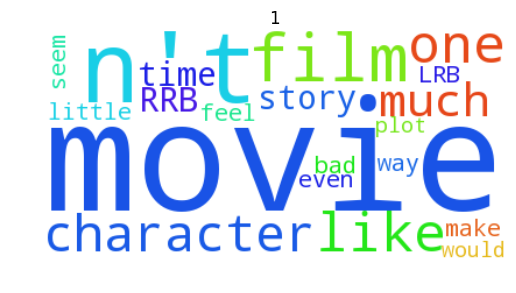

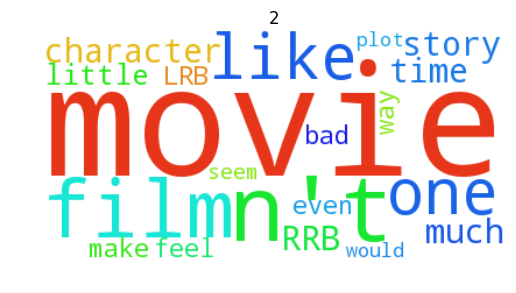

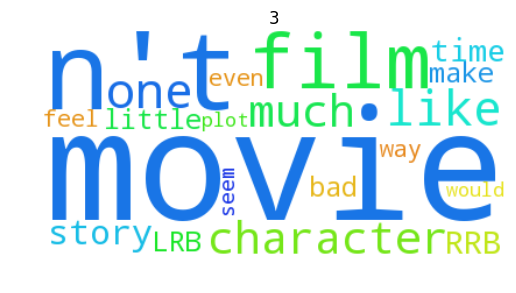

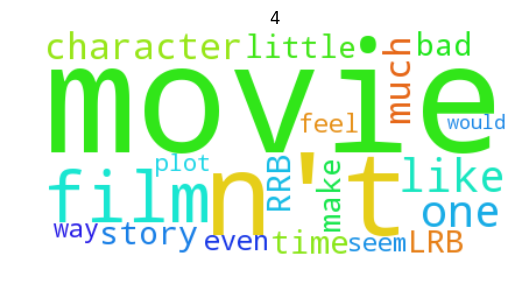

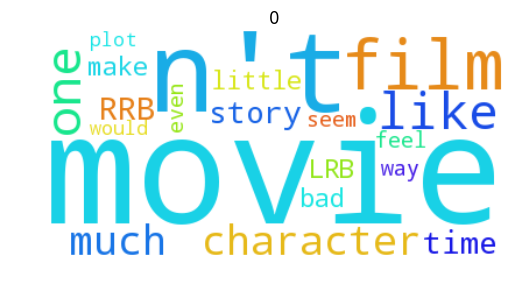

In [114]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
range = [1,2,3,4,0]
cloud = WordCloud(background_color="white", max_words=20, stopwords=stopwords.words('english'))
for i in range: 
    positive_cloud = cloud.generate(df.loc[df.Sentiment == 1, 'Phrase'].str.cat(sep='\n'))
    plt.figure()
    plt.imshow(positive_cloud)
    plt.axis("off")
    plt.title(i)
    plt.show()

In [148]:
# Transformer des caractères spéciaux en ASCII + maj to minuscules ( sorte de normalisation)
df['Phrase'] = (df['Phrase'].str.lower()
              .str.decode('utf-8')
              .map(lambda x: unicodedata.normalize('NFKD', x))
              .str.encode('ascii', 'ignore'))



 1) Remove punctuation marks and transform all characters to lowercase using nlk library 2) Remove stop words 3) Steaming

Sans oublier la segmentation afin de separer chaque phrase en mot l idée c que chaque mot dans une phrase va être consideré comme étant un feature
and finally tfidf

In [149]:
# remove punctionation
stemmer = PorterStemmer()
def remove_punctuation(s):
    s = ''.join([i for i in s if i not in set(string.punctuation)])
    return s

df['Phrase'] = df['Phrase'].apply(remove_punctuation)
#stemming
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

In [150]:
df['Phrase'] = df['Phrase'].apply(tokenize)

In [151]:
#stop words
stop = stopwords.words('english')
stop.extend(['will','now','today','movie','serie','series','story','film'])

df['Phrase'] = df['Phrase'].apply(lambda x: [item for item in x if item not in stop])

In [121]:
#delete empty rows

#df['Phrase'] = df[df.Phrase.map(lambda x: len(x) if isinstance(x, list) else None) != 0]
#df = df.dropna()

In [152]:
#transform a list to one string
df['Phrase'] = df.Phrase.map(lambda x: ' '.join(x))

In [124]:
#remove duplicates rows because after pre-processing we get same occurences

#df = df.drop_duplicates()

In [153]:
# we can improve it with changing parameters and add other parametrs 
# for example ngrams 
# max_df , min_df  and max_feature
vect = TfidfVectorizer(min_df=5,sublinear_tf=True, analyzer='word', stop_words=stop, tokenizer=tokenize , strip_accents = 'ascii',  max_df = 0.8 ,ngram_range = (1,2))

In [154]:
df.shape

(156060, 2)

In [155]:
X = vect.fit_transform(df.pop('Phrase'))

In [ ]:
#sparse matrix to datframe here i used a loop because the memory of my computer does not suppert #to transfor matrix to dataframe en un seul coup that why it take time 
for i, col in enumerate(vect.get_feature_names()):
    df[col] = pd.SparseSeries(X[:, i].toarray().reshape(-1,), fill_value=0)

In [87]:
df.shape

(49479, 5955)

In [55]:
#df

In [19]:
for i, col in enumerate(vect.get_feature_names()):
    df_test[col] = pd.SparseSeries(X[:, i].toarray().reshape(-1,), fill_value=0)

In [141]:
#test if there are any NaN
print(df.isnull().values.sum().sum())


0


In [46]:
df.isnull().values.any()

True

In [106]:
label = df.Sentiment
train= df.drop('Sentiment', axis=1)

In [107]:
#with k = 5000 the number of feature ( not sure if it correct or not)
X_new = SelectKBest(chi2, k=100).fit_transform(train, label)


In [19]:
df.head()

,Sentiment,1,10,100,10000,100minut,101,102minut,103minut,104,...,zipper,zippi,zish,ziyi,zoe,zombi,zone,zooland,zucker,zwick
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
X_new

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [107]:
#validation for svm
#there are an error to check it ( grid search ne marche pas i will check why after)
label = df.Sentiment
train= df.drop('Sentiment', axis=1)


from sklearn.pipeline import Pipeline
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                      ('clf', LinearSVC()),
 ])
from sklearn.model_selection import GridSearchCV
parameters = {'tfidf_min_df': [[0.8, 1.0], 1],
               'tfidf__max_df': ([0.8, 1.0], 1),
               'clf__c': (0.1, 1 , 10),
 }
gs_clf = GridSearchCV(text_clf, parameters)
gs_clf = gs_clf.fit(train.as_matrix(), label)





MemoryError: 

In [105]:
label = df['Sentiment'].values
train= df.drop('Sentiment', axis=1)
classif = SklearnClassifier(LinearSVC())
# Séparation du set de train et de test
X_train,X_test,y_train,y_test = train_test_split(train.as_matrix(),label, test_size = 0.33)


MemoryError: 

In [ ]:
#grid search to find the best parameters


In [ ]:
#pd.SparseDataFrame(X.todense(), columns=vect.get_feature_names(), index=df.index) 

In [253]:
#X = vect.fit_transform(df.pop('Phrase'))
#X = vect.fit_transform(df.pop('Phrase')).toarray()

#for i, col in enumerate(vect.get_feature_names()):
    #df[col] = X[:, i]

In [90]:
#r = df[['Sentiment']].copy()
#del df
#d = pd.DataFrame(X.toarray(), columns=vect.get_feature_names(), iterator=True, chunksize=10)

#d = pd.DataFrame(X, columns=vect.get_feature_names())
#del X
#del vect



In [91]:
#d.head()